In [1]:
import numpy
import os
import json
import csv
import pandas as pd
import numpy as np
np.random.seed(42)

In [2]:
path = "../data"

In [3]:
file = "30output.csv"

In [4]:
data = pd.read_csv(os.path.join(path,file),header=None)
unbalancedData = pd.read_csv(os.path.join(path,file),header=None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,Kuntal-012345678910111213141516171819202122232...,-1.701555,-1.996812,-1.990745,-0.899572,-0.896101,-0.931551,-0.941841,5.287117,-0.970189,...,0.092,-0.141640,-0.224180,0.13984,-0.93244,-0.615007,0.716846,1.385926,0.0,0
1,Kuntal-123456789101112131415161718192021222324...,-1.744127,-2.015991,-2.017455,-0.906949,-0.911460,-0.920783,-0.950861,4.363348,-0.969577,...,0.092,-0.141640,-0.224180,0.13984,-0.93244,-0.615007,0.716846,1.385926,0.0,0
2,Kuntal-234567891011121314151617181920212223242...,-1.750082,-1.999216,-1.978700,-0.903252,-0.906839,-0.919422,-0.959974,8.767003,-0.968914,...,0.092,-0.145587,-0.242633,0.13106,-0.93244,-0.615007,0.716846,1.385926,0.0,0
3,Kuntal-345678910111213141516171819202122232425...,-1.793621,-2.024890,-1.994392,-0.914382,-0.954515,-0.918488,-0.969694,16.174956,-0.968291,...,0.092,-0.152513,-0.254647,0.13106,-0.93244,-0.615007,0.716846,1.385926,0.0,0
4,Kuntal-456789101112131415161718192021222324252...,-1.809896,-2.036803,-1.994056,-0.934013,-0.978788,-0.921620,-0.981831,23.728927,-0.967772,...,0.092,-0.152513,-0.254647,0.13106,-0.93244,-0.615007,0.716846,1.385926,0.0,0


In [7]:
noneatData = data[data[data.columns[134]]==0]

In [8]:
eatData = data[data[data.columns[134]]==1]

In [9]:
print(noneatData.shape,eatData.shape)

(74369, 135) (3181, 135)


In [10]:
noneatData = noneatData.sample(n=3181)

In [11]:
print(noneatData.shape,eatData.shape)

(3181, 135) (3181, 135)


### Data Vectorization

In [12]:
data = pd.concat([noneatData,eatData])

In [13]:
X_data = np.array(data[data.columns[1:134]].values.tolist())
X_unbalancedData = np.array(unbalancedData[unbalancedData.columns[1:134]].values.tolist())

In [14]:
#data[data.columns[134]].head()
X_data[0].shape

(133,)

In [15]:
print (X_data.shape,X_unbalancedData.shape)

(6362, 133) (77550, 133)


In [16]:
Y_data = np.array(data[data.columns[134]].values.tolist())
Y_unbalancedData = np.array(unbalancedData[unbalancedData.columns[134]].values.tolist())

In [17]:
print(Y_data.shape,Y_unbalancedData.shape)

(6362,) (77550,)


### Feature Selection

#### L1-based feature selection

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [19]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_data, Y_data)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_data)
X_new.shape

/home/kuntal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(6362, 9)

#### Tree-based feature selection (Works very good)

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clfTree = ExtraTreesClassifier(n_estimators=50)
clfTree = clfTree.fit(X_data, Y_data)
print (clfTree.feature_importances_)  

model = SelectFromModel(clfTree, prefit=True)
X_new = model.transform(X_data)
print (X_new.shape)

[4.55733648e-04 8.44557040e-05 1.94765804e-02 2.46446590e-04
 1.96142742e-02 1.97535534e-02 0.00000000e+00 1.12556904e-04
 0.00000000e+00 5.69804630e-02 2.97831335e-04 3.92834480e-02
 5.89229895e-02 5.93403132e-02 7.72156484e-03 6.05450084e-04
 6.16059388e-04 2.46446590e-04 0.00000000e+00 1.40734190e-04
 2.81442984e-04 1.12556904e-04 0.00000000e+00 1.12556904e-04
 0.00000000e+00 0.00000000e+00 1.23166790e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.34355081e-05 0.00000000e+00 1.00206368e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.12556904e-04 0.00000000e+00 1.12556904e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.43796178e-05 8.54784280e-05
 8.22340567e-04 1.94765804e-02 2.46446590e-04 2.56196072e-04
 5.16126036e-04 2.81772863e-05 2.46446590e-04 1.24544624e-02
 0.00000000e+00 2.46446590e-04 0.00000000e+00 0.00000000e+00
 1.98744063e-02 0.00000000e+00 1.96409965e-02 6.68376141e-05
 8.54784280e-05 0.000000

In [21]:
X_unbalanced_new = model.transform(X_unbalancedData)
print(X_unbalanced_new.shape)

(77550, 30)


### Classification

In [22]:
from sklearn.svm import SVC

In [23]:
clf = SVC(gamma='auto')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_data, test_size=0.30, random_state=42, shuffle =True)

In [25]:
print (y_train)

[1 1 1 ... 1 1 0]


In [26]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
from sklearn.metrics import accuracy_score
preds_val = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.06%


#### Parameter Search by GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(XData, yData, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ["linear", "rbf","sigmoid"]
    #kernels = ["linear"]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
    grid_search = GridSearchCV(SVC(cache_size=2000), param_grid, cv=nfolds, n_jobs=-1, verbose=2)
    grid_search.fit(XData, yData)
    grid_search.best_params_
    return grid_search.best_params_

In [29]:
best_params = svc_param_selection(X_train,y_train,5)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


In [30]:
best_params

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [31]:
clf = SVC(gamma=best_params['gamma'], C=best_params['C'], kernel = best_params['kernel'])
#clf = SVC(gamma=0.001, C=0.1, kernel = 'linear')

In [32]:
clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Testing Accuracy

In [39]:
preds_val = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.06%


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, preds_val)

array([[764, 198],
       [488, 459]])

In [42]:
preds_val.shape

(1909,)

In [43]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[764 198]
 [488 459]]


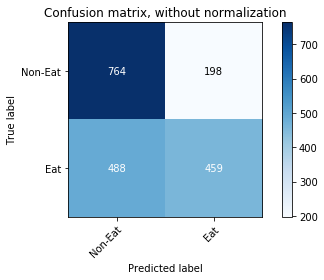

In [44]:
plot_confusion_matrix(y_test, preds_val,np.array(['Non-Eat','Eat']))

#### Testing with Unbalanced data (77670 samples)

In [45]:
#print(X_unbalanced_new.shape)
preds_val_unbalanced = clf.predict(X_unbalanced_new)
accuracy = accuracy_score(Y_unbalancedData, preds_val_unbalanced)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.03%


Confusion matrix, without normalization
[[59051 15318]
 [ 1721  1460]]


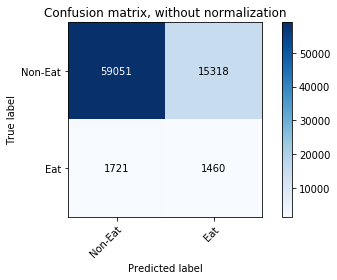

In [46]:
plot_confusion_matrix(Y_unbalancedData, preds_val_unbalanced,np.array(['Non-Eat','Eat']))

### Training Accuracy

In [47]:
print(X_train.shape)
preds_val_train = clf.predict(X_train)
accuracy = accuracy_score(y_train, preds_val_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(4453, 30)
Accuracy: 61.46%


Confusion matrix, without normalization
[[1736  483]
 [1233 1001]]


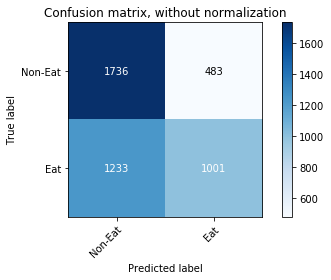

In [48]:
plot_confusion_matrix(y_train, preds_val_train,np.array(['Non-Eat','Eat']))

## Random Forest

In [49]:
from  sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=0)

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(5,10,20), 
              'max_depth': range(1, 10, 5),
             }
    

In [51]:
model1.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [52]:
gs_clf = GridSearchCV(RandomForestClassifier(random_state=0),parameters, cv=5, n_jobs=1,verbose=2)

In [53]:
print (X_train.shape, y_train.shape)
model = gs_clf.fit(X_train, y_train)

(4453, 30) (4453,)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ...................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=6, n_estimators=5 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [54]:
print(model.best_params_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, model.best_params_[param_name]))

{'max_depth': 1, 'n_estimators': 5}
max_depth: 1
n_estimators: 5


In [55]:
from sklearn.metrics import accuracy_score
preds_val = model.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.06%


Confusion matrix, without normalization
[[764 198]
 [488 459]]


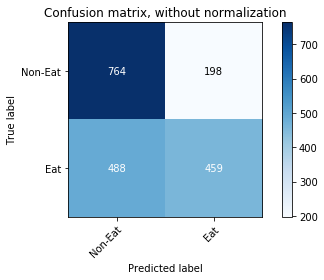

In [56]:
plot_confusion_matrix(y_test, preds_val,np.array(['Non-Eat','Eat']))

#### Training Accuracy

In [57]:
from sklearn.metrics import accuracy_score
preds_val_train = model.predict(X_train)
accuracy = accuracy_score(y_train, preds_val_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.46%


Confusion matrix, without normalization
[[1736  483]
 [1233 1001]]


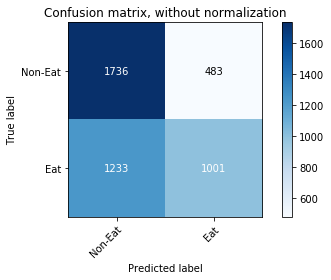

In [58]:
plot_confusion_matrix(y_train, preds_val_train,np.array(['Non-Eat','Eat']))

#### Test with unbalanced data

In [59]:
from sklearn.metrics import accuracy_score
preds_val = model.predict(X_unbalanced_new)
accuracy = accuracy_score(Y_unbalancedData, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.00%


Confusion matrix, without normalization
[[59029 15340]
 [ 1721  1460]]


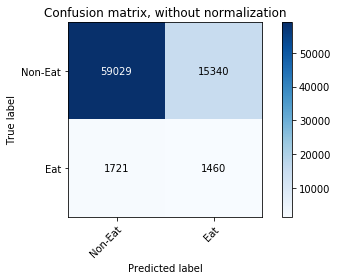

In [60]:
plot_confusion_matrix(Y_unbalancedData, preds_val,np.array(['Non-Eat','Eat']))